# Fantasy Premier League

## Budget

For the begining of the Season, managers are given a budget of 100M $. Then each player buy any combination of player not exceeding this limit.

In this notebook, we will study the patterns that appear in the budget strategy of top managers from the 2020-2021 FPL Season.

In [3]:
import pandas as pd
import numpy as np
import glob
import os

path = '../data/fpl_official/20-21/season/processed/'

all_files = (
    glob.glob(os.path.join(path, "gk_value_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "gk_value_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "gk_value_100000.csv"))
)
gk_value = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
gk_value = pd.concat(gk_value)
gk_value.sort_index(inplace=True)

all_files = (
    glob.glob(os.path.join(path, "def_value_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "def_value_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "def_value_100000.csv"))
)
def_value = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
def_value = pd.concat(def_value)
def_value.sort_index(inplace=True)

all_files = (
    glob.glob(os.path.join(path, "mid_value_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "mid_value_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "mid_value_100000.csv"))
)
mid_value = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
mid_value = pd.concat(mid_value)
mid_value.sort_index(inplace=True)

all_files = (
    glob.glob(os.path.join(path, "fwd_value_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "fwd_value_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "fwd_value_100000.csv"))
)

fwd_value = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
fwd_value = pd.concat(fwd_value)
fwd_value.sort_index(inplace=True)

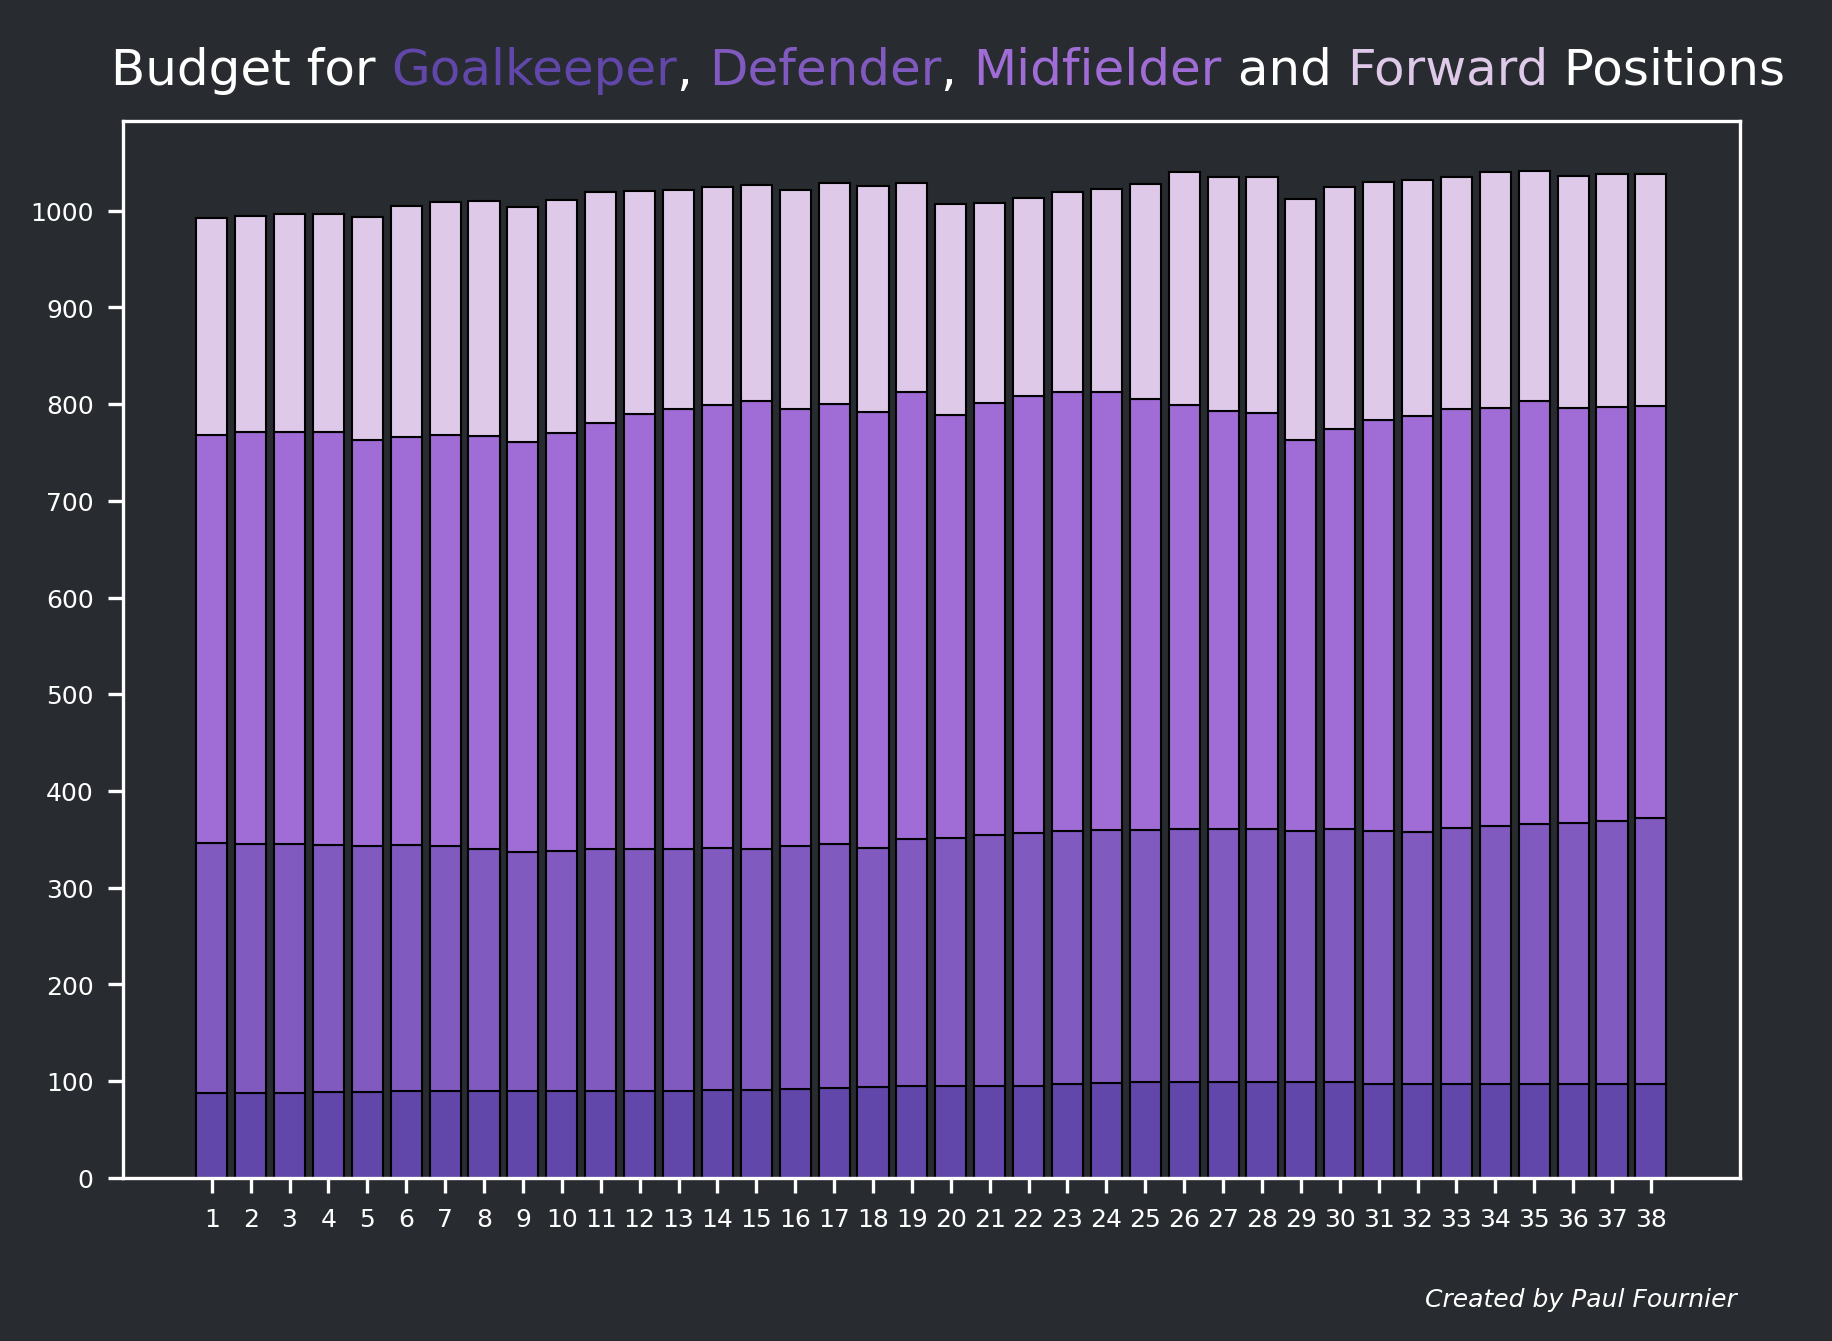

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from highlight_text import fig_text

body_font = "Open Sans"
watermark_font = "DejaVu Sans"
text_color = "w"
background = "#282B2F"
title_font = "DejaVu Sans"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.edgecolor'] = text_color
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6

fig, ax = plt.subplots(1, 1, tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

gk, defender, mid, fwd = [], [], [], []

for gw in range(1, 39):
    gk.append(np.mean(gk_value.loc[:, str(gw)]))
    defender.append(np.mean(def_value.loc[:, str(gw)]))
    mid.append(np.mean(mid_value.loc[:, str(gw)]))
    fwd.append(np.mean(fwd_value.loc[:, str(gw)]))

ax.bar(np.arange(1, 39), gk, color='#6247aa', edgecolor='black', linewidth=0.5); bottom_y = np.array(gk)
ax.bar(np.arange(1, 39), defender, color='#815ac0', bottom=bottom_y, edgecolor='black', linewidth=0.5); bottom_y += np.array(defender)
ax.bar(np.arange(1, 39), mid, color='#a06cd5', bottom=bottom_y, edgecolor='black', linewidth=0.5); bottom_y += np.array(mid)
ax.bar(np.arange(1, 39), fwd, color='#dec9e9', bottom=bottom_y, edgecolor='black', linewidth=0.5)

ax.set_xticks(np.arange(1, 39), minor=False)
ax.set_yticks(np.arange(0, 1010, 100), minor=False)

fig_text(x=0.07, y=1.025,
        s="Budget for <Goalkeeper>, <Defender>, <Midfielder> and <Forward> Positions",
        highlight_textprops=[
            {"color": '#6247aa'},
            {"color": '#815ac0'},
            {"color": '#a06cd5'},
            {"color": '#dec9e9'},
            ],
        fontweight="regular", fontsize=12, fontfamily=title_font,
        color=text_color, alpha=1)

fig.text(
    0.8, -0.025, "Created by Paul Fournier",
    fontstyle="italic", fontsize=6, fontfamily=watermark_font, color=text_color)

plt.show()

# Bench value

In [14]:
all_files = (
    glob.glob(os.path.join(path, "bench_value_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "bench_value_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "bench_value_100000.csv"))
)
bench_value = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
bench_value = pd.concat(bench_value)
bench_value.sort_index(inplace=True)

all_files = (
    glob.glob(os.path.join(path, "team_value_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "team_value_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "team_value_100000.csv"))
)
team_value = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
team_value = pd.concat(team_value)
team_value.sort_index(inplace=True)

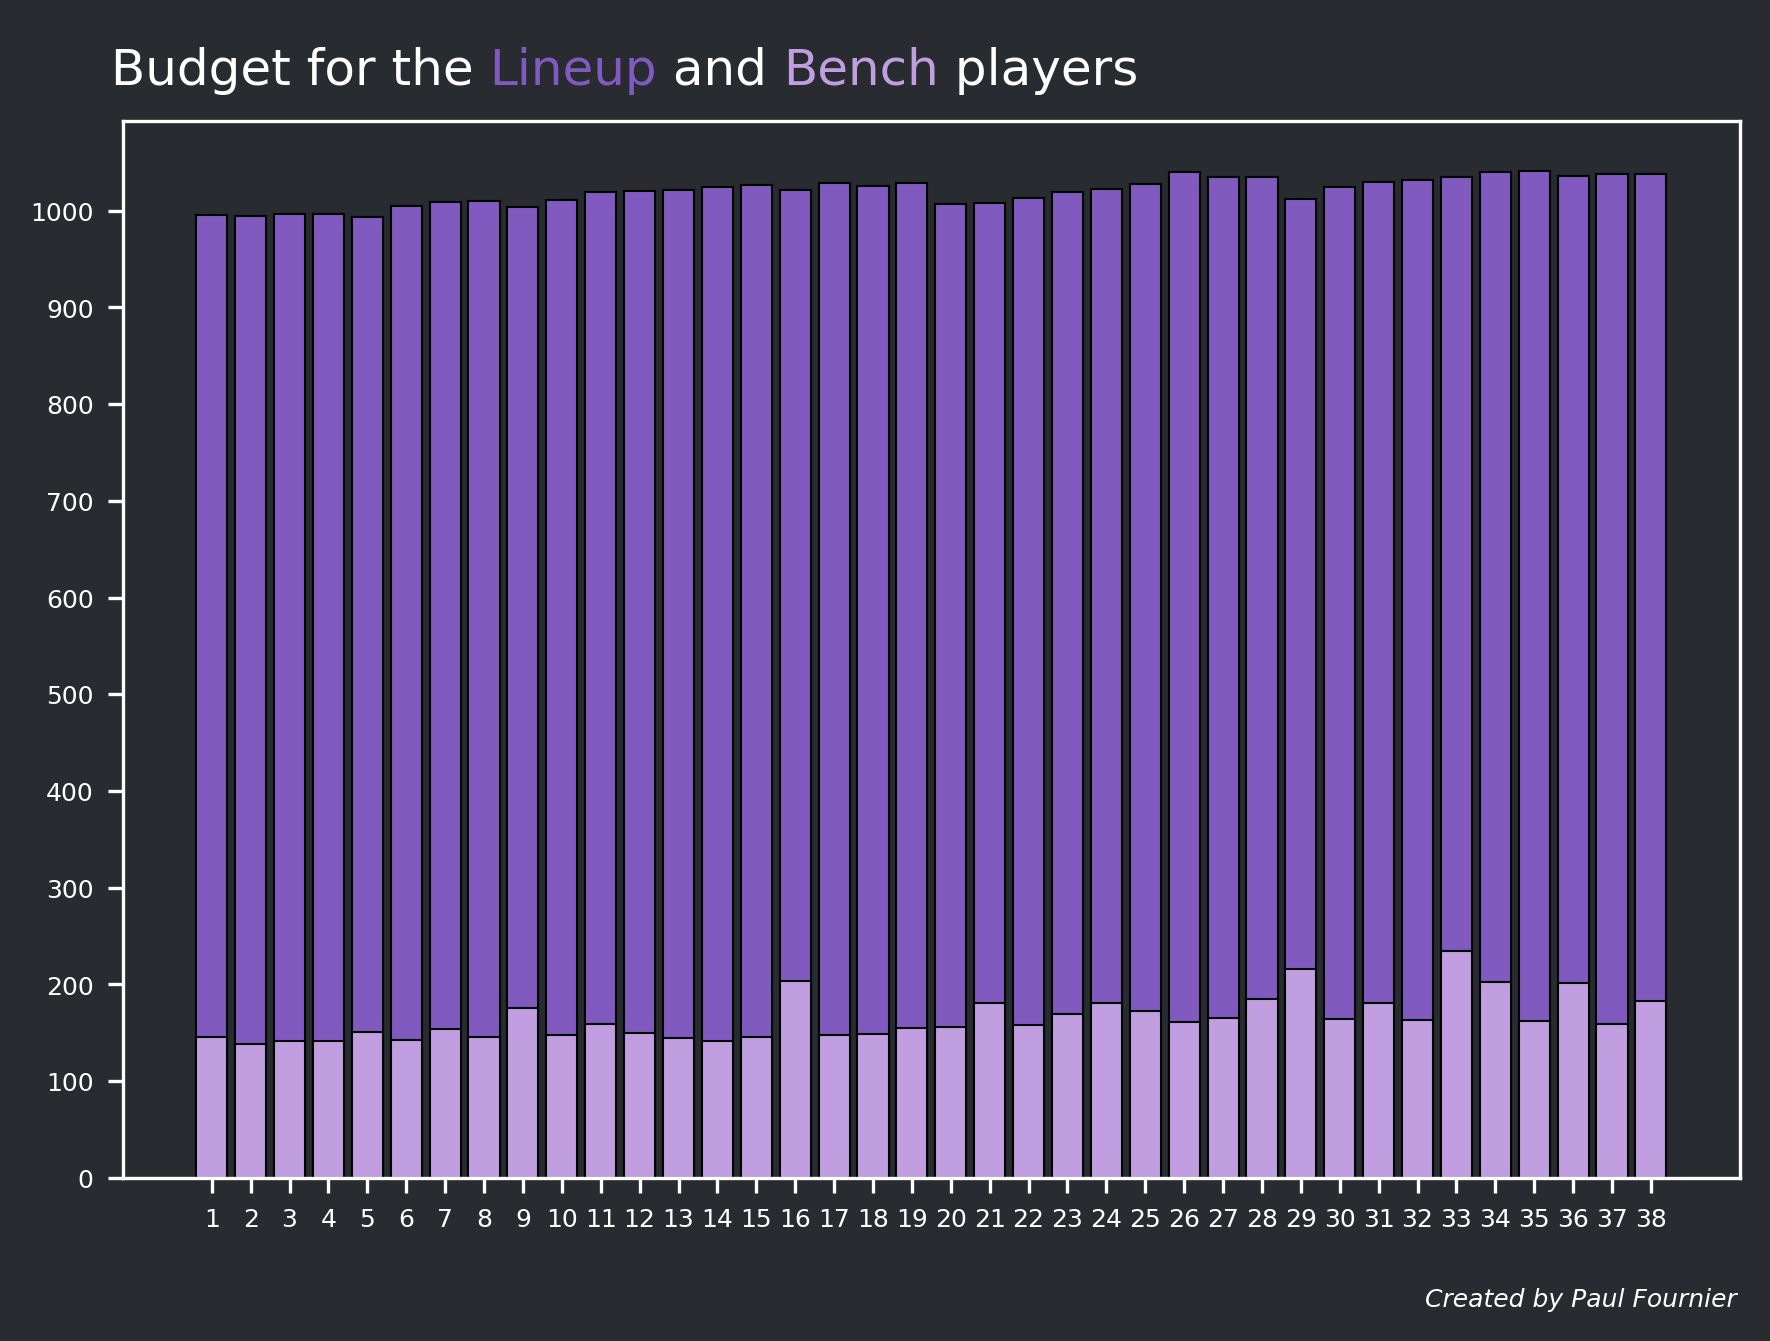

In [19]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

lineup, bench = [], []

for gw in range(1, 39):
    lineup.append(np.mean(team_value.loc[:, str(gw)]))
    bench.append(np.mean(bench_value.loc[:, str(gw)]))

ax.bar(np.arange(1, 39), lineup, color='#815ac0', edgecolor='black', linewidth=0.5)
ax.bar(np.arange(1, 39), bench, color='#c19ee0', edgecolor='black', linewidth=0.5)

ax.set_xticks(np.arange(1, 39), minor=False)
ax.set_yticks(np.arange(0, 1010, 100), minor=False)

fig_text(x=0.07, y=1.025,
        s="Budget for the <Lineup> and <Bench> players",
        highlight_textprops=[
            {"color": '#815ac0'},
            {"color": '#c19ee0'},
            ],
        fontweight="regular", fontsize=12, fontfamily=title_font,
        color=text_color, alpha=1)

fig.text(
    0.8, -0.025, "Created by Paul Fournier",
    fontstyle="italic", fontsize=6, fontfamily=watermark_font, color=text_color)

plt.show()

# In The Bank

In [21]:
all_files = (
    glob.glob(os.path.join(path, "in_the_bank_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "in_the_bank_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "in_the_bank_100000.csv"))
)
in_the_bank = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
in_the_bank = pd.concat(in_the_bank)
in_the_bank.sort_index(inplace=True)

In [30]:
in_the_bank_10k = in_the_bank.iloc[:10000][['1', '2', '3']]
in_the_bank_10k.describe().iloc[1:]

,1,2,3
mean,4.24050,7.910900,14.887200
std,6.81728,27.026117,39.720663
min,0.00000,0.000000,0.000000
25%,0.00000,0.000000,1.000000
50%,0.00000,1.000000,3.000000
75%,5.00000,9.000000,11.000000
max,65.00000,531.000000,601.000000


In [31]:
in_the_bank_25k = in_the_bank.iloc[10000:25000][['1', '2', '3']]
in_the_bank_25k.describe().iloc[1:]

,1,2,3
mean,4.316333,8.276467,15.674333
std,7.165963,27.959748,41.401375
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,1.000000,3.000000
75%,5.000000,9.000000,11.000000
max,80.000000,608.000000,636.000000


In [32]:
in_the_bank_50k = in_the_bank.iloc[25000:50000][['1', '2', '3']]
in_the_bank_50k.describe().iloc[1:]


,1,2,3
mean,4.598000,8.64676,16.885520
std,7.536091,27.30540,43.504735
min,0.000000,0.00000,0.000000
25%,0.000000,0.00000,1.000000
50%,0.000000,3.00000,3.000000
75%,5.000000,9.00000,12.000000
max,100.000000,601.00000,601.000000
